# Hough Lines and circles


We start by importing the necessary packages:

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

We'll now load in the image checkers.jpg and display it.

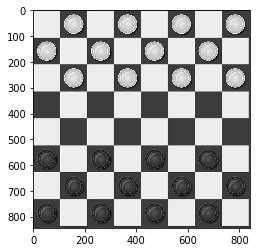

In [46]:
img = cv2.imread('checkers.png')
#cv2.imshow('checkers',img)
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

In [12]:
(h,w,d)=img.shape

First we would like to detect the lines in the image using Hough Lines. OpenCV has a function to do this, called [cv2.HoughLines](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=houghlines#houghlines) (Click to see the documentation). It is found that this function takes a 1-channel image as input, i.e. a grayscale image. The image is already in black and white, but it has been loaded as a rgb image, so we still need to convert it:

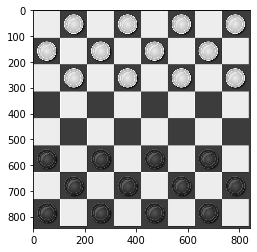

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap=cm.gray)


Next we use the edge detection [canny](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=canny) to make it easier to locate the lines. Recall the previous exercise where we used the same function and played around with the threshold.

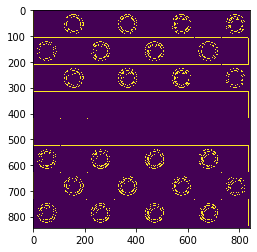

In [41]:
edges = cv2.Canny(gray, 20, 200)
plt.imshow(edges)

You might notice that many of the lines aren't found by the edge detector. In this case it is because the picture is resized to fit the output cell. If you have the full image, the lines should show up nicely.
Now we can use the HoughLines function. From the documentation it is seen that it returns a vector of the lines. As parameters, the function takes the grayscale image (edges), the resolution of the radius "r" in pixels (we choose 1), the resolution of the angle "theta" in radians (we choose 1 radian) and the minimum number of intersections to detect a line (We choose 150).

In [6]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 200) 

The lines are given in polar coordinates, so we will now convert them to cartesian coordinates in order to show them in the image. Numpy has its own cos and sin functions. We make a loop that goes through every line, converts the coordinates to cartesian and draws a line in the original image.

In [7]:
for i in range(len(lines)):
    r = lines[i][0][0]
    theta = lines[i][0][1]
    
    x0 = r * np.cos(theta)
    y0 = r * np.sin(theta)
    
    pt1 = (int(x0 + 1000 * (-np.sin(theta))), int(y0 + 1000 * np.cos(theta)))
    pt2 = (int(x0 - 1000 * (-np.sin(theta))), int(y0 - 1000 * np.cos(theta)))
    
    cv2.line(img, pt1, pt2, (255, 0, 0), 3)

Finally we can show the image:

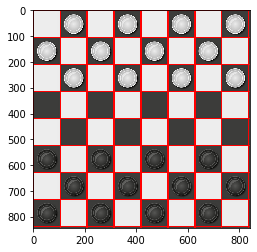

In [8]:
plt.imshow(img)

We can see that we have found all the lines of the checkerboard.


## Exercise 1
For the same checkerboard image, detect the checkerboard pieces using the OpenCV function [cv2.HoughCircles](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=houghcircles#houghcircles). Try to find all the pieces and no false circles, by tweaking the different parameters. 

In [57]:
circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT ,1.2, 100) 

In [58]:
len(circles)

1

In [59]:
for i in range(len(circles)):
    center=(circles[i][0][0],circles[i][0][1])
    radius=circles[i][0][2]
    cv2.circle(img, center, radius , (0, 255, 0), 3)

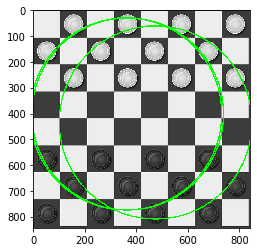

In [60]:
plt.imshow(img)